In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

#Cargar los datos del archivo CSV Data/Cleaned/SFV_2023.csv
df_SFV = pd.read_csv('../Data/Cleaned/SFV_2023.csv', sep=',')
# Cargar los datos del archivo CSV
df_solcast = pd.read_csv('../Data/Cleaned/solcast_2023.csv', sep=',')

def calculate_energy(alpha, beta, Fecha):
    # filtrar un día de datos
    row_day_solcast = df_solcast.loc[df_solcast['Date'] == Fecha]
    row_day_fronius = df_SFV.loc[df_SFV['Date'] == Fecha]

    # reiniciar el índice
    row_day_solcast = row_day_solcast.reset_index(drop=True)
    row_day_fronius = row_day_fronius.reset_index(drop=True)
    # Ordenar row_day_solcast de menor a mayor hora
    row_day_solcast = row_day_solcast.sort_values(by='Time')
    row_day_solcast = row_day_solcast.reset_index(drop=True)
    # Crear un nuevo dataframe con los datos de solcast y fronius a partir del índice 
    df = pd.DataFrame()
    df['Time'] = row_day_solcast['Time']
    df['GHI'] = row_day_solcast['GHI']
    df['air_temp'] = row_day_solcast['air_temp']
    df['cloud_opacity'] = row_day_solcast['cloud_opacity']
    df['Producción_fotovoltaica_SFV'] = row_day_fronius['Producción_fotovoltaica_SFV']

    ## Modelo matemático
    # Parámetros alpha y beta 
    alpha = alpha
    beta = beta

    # Parámetros SFV
    efficiency = 0.2094  # Eficiencia del panel solar
    catidad_pv= 30
    area =2.274*1.134

    # Normalizar 'cloud_opacity' de 0 a 1  en donde 1 es el valor más alto
    df['cloud_opacity'] = df['cloud_opacity'] / df['cloud_opacity'].max()
    # Normalizar 'air_temp' de 0 a 1  en donde 1 es el valor más alto
    df['air_temp'] = df['air_temp'] / df['air_temp'].max()

    # Energía calculada a partir de Solcast 
    df['P_cloud_opacity_temp'] = df['GHI'] * efficiency *  area * catidad_pv * (1 - beta*df['cloud_opacity']) * (1 - alpha*df['air_temp'])
    # Suma de la potencia generada solcast
    energia = df['P_cloud_opacity_temp']*(5/60)
    print("Energía calculada solacast [kWh] =",energia.sum()/1000)

    # Energía calculada a partir de Fronius
    df['Potencia'] = df['Producción_fotovoltaica_SFV'] / (5/60)
    energia_fronius = df['Producción_fotovoltaica_SFV'].sum()
    print("Producción fotovoltaica SVF [kWh/día] =",energia_fronius/1000)

    # Error porcentual
    error = abs(energia.sum() - energia_fronius) / energia_fronius * 100
    print('Error porcentual:', error, '%')

    # Horas de brillo solar
    hbs = energia_fronius / (30*0.54)
    print("Horas de brillo solar =", hbs/1000)

    # Graficar la energía generada por solcast y fronius
    plt.figure(figsize=(15, 5))
    plt.plot(df['Time'], df['P_cloud_opacity_temp'], label='Solcast')
    plt.plot(df['Time'], df['Potencia'], label='Fronius')
    # Graficar área bajo la curva
    plt.fill_between(df['Time'], df['P_cloud_opacity_temp'], df['Potencia'], color='gray', alpha=0.2)
    plt.title('Potencia generada por Solcast y Fronius')
    plt.xlabel('Hora')
    plt.ylabel('Potencia [W]')
    plt.legend()
    plt.xticks([100, 150, 200])
    plt.show()

# Definir los widgets
alpha_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Alpha:')
beta_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Beta:')
fecha_dropdown = widgets.Dropdown(options=df_solcast['Date'].unique(), description='Fecha:')

# Crear la función para mostrar la salida al interactuar con los widgets
def on_value_change(change):
    alpha = alpha_slider.value
    beta = beta_slider.value
    fecha = fecha_dropdown.value
    calculate_energy(alpha, beta, fecha)

# Conectar la función al evento de cambio de valor de los widgets
alpha_slider.observe(on_value_change, names='value')
beta_slider.observe(on_value_change, names='value')
fecha_dropdown.observe(on_value_change, names='value')

# Mostrar los widgets
display(alpha_slider, beta_slider, fecha_dropdown)


FloatSlider(value=0.5, description='Alpha:', max=1.0, step=0.01)

FloatSlider(value=0.5, description='Beta:', max=1.0, step=0.01)

Dropdown(description='Fecha:', options=('2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', …

Energía calculada solacast [kWh] = 34.87896739525895
Producción fotovoltaica SVF [kWh/día] = 61.08811
Error porcentual: 42.90383612251395 %
Horas de brillo solar = 3.7708709876543205


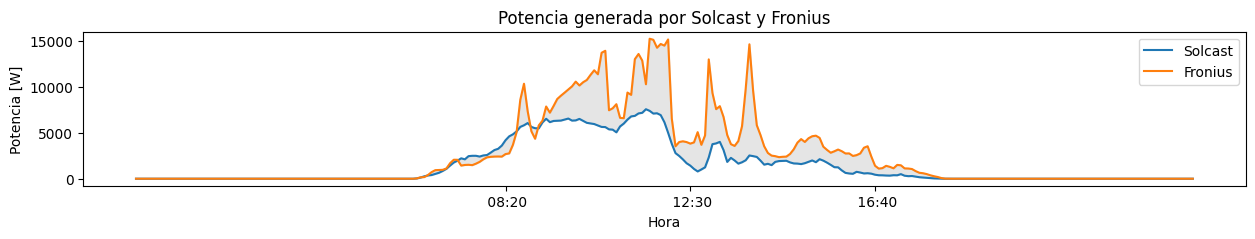

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️


Energía calculada solacast [kWh] = 12.37840630354383
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 49.011102826113174 %
Horas de brillo solar = 1.4985598765432095


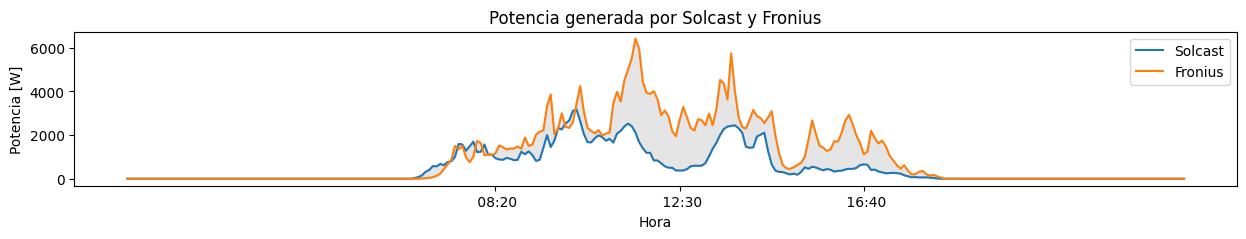

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 12.510435200844407
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 48.467251888976506 %
Horas de brillo solar = 1.4985598765432095


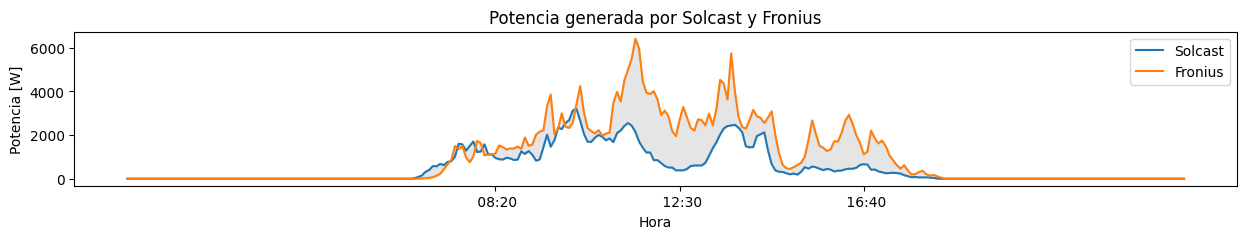

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 15.679128736058326
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 35.41482939769611 %
Horas de brillo solar = 1.4985598765432095


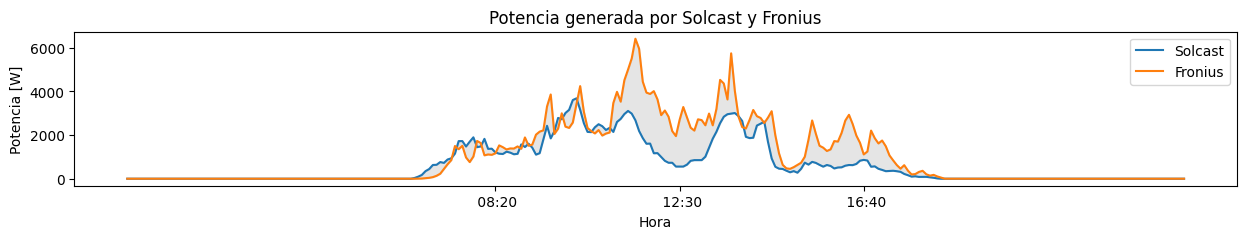

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 16.471302119861807
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 32.151723774876004 %
Horas de brillo solar = 1.4985598765432095


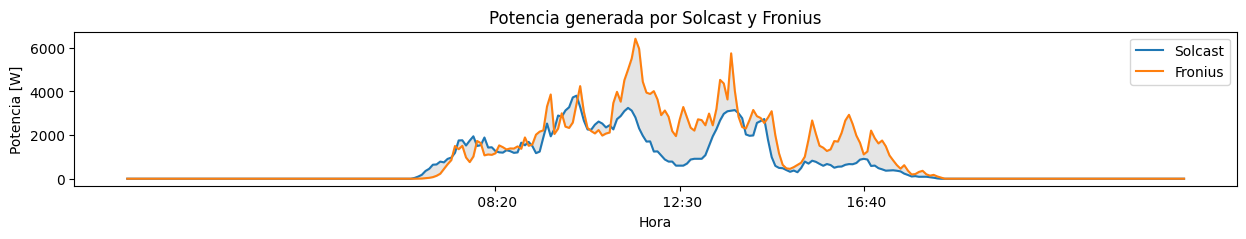

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 16.999417709064126
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 29.97632002632929 %
Horas de brillo solar = 1.4985598765432095


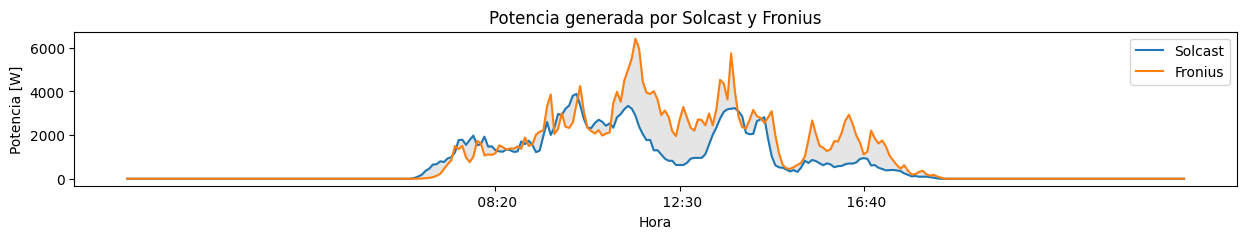

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 17.131446606364705
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 29.432469089192605 %
Horas de brillo solar = 1.4985598765432095


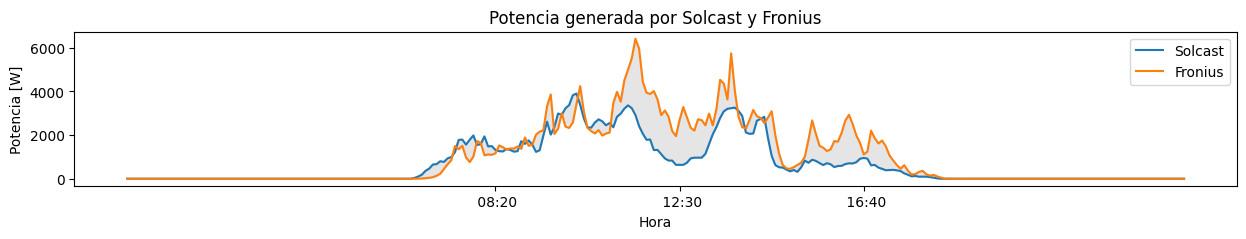

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 17.263475503665287
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 28.888618152055916 %
Horas de brillo solar = 1.4985598765432095


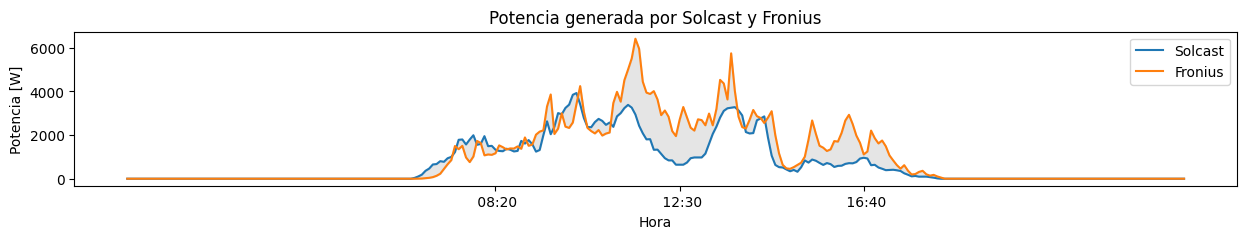

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 17.395504400965862
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 28.34476721491924 %
Horas de brillo solar = 1.4985598765432095


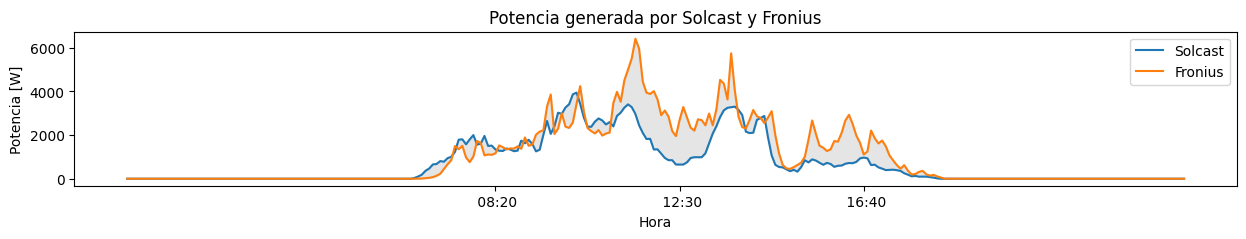

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 17.527533298266444
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 27.800916277782555 %
Horas de brillo solar = 1.4985598765432095


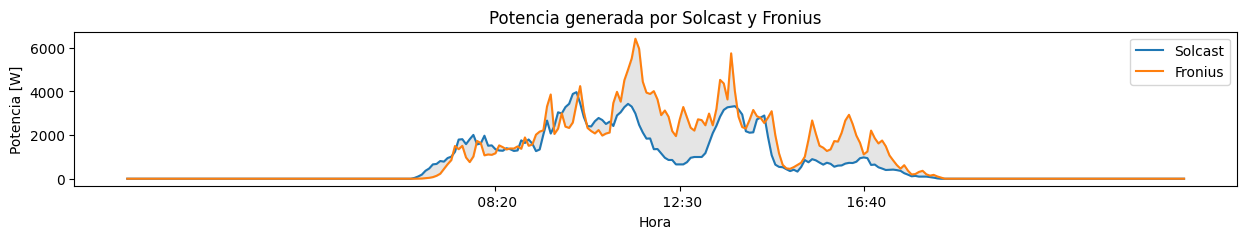

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 17.923619990168184
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 26.169363466372513 %
Horas de brillo solar = 1.4985598765432095


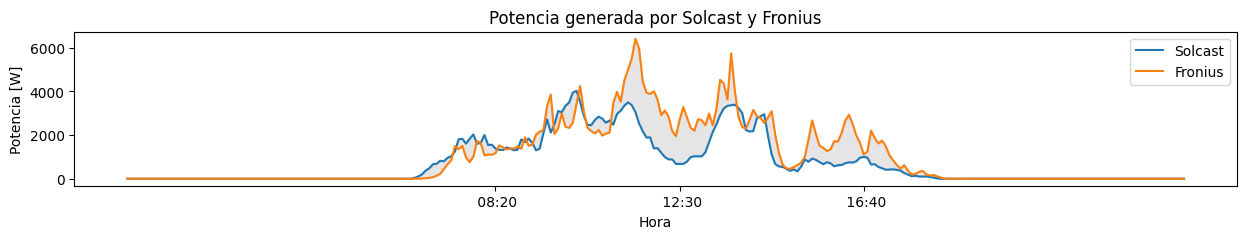

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 18.055648887468763
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 25.625512529235827 %
Horas de brillo solar = 1.4985598765432095


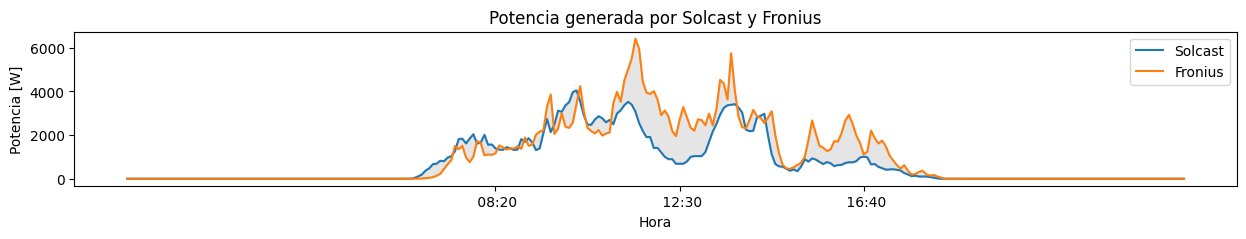

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 18.847822271272246
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 22.36240690641572 %
Horas de brillo solar = 1.4985598765432095


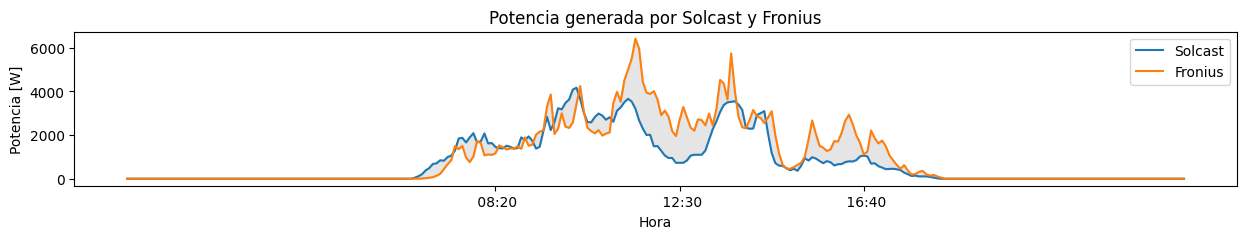

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 18.71579337397166
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 22.90625784355242 %
Horas de brillo solar = 1.4985598765432095


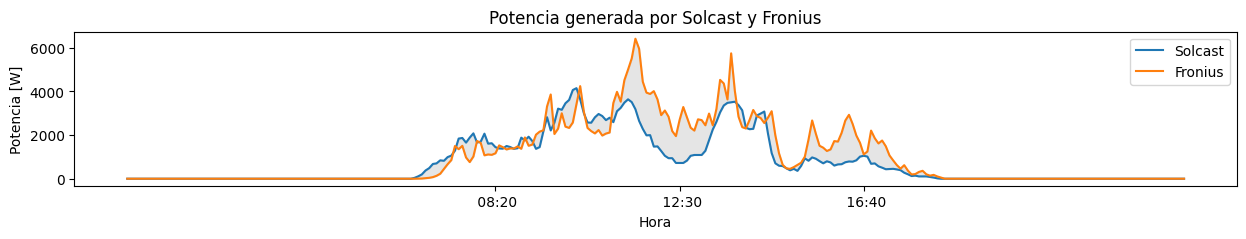

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 18.58376447667108
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 23.450108780689106 %
Horas de brillo solar = 1.4985598765432095


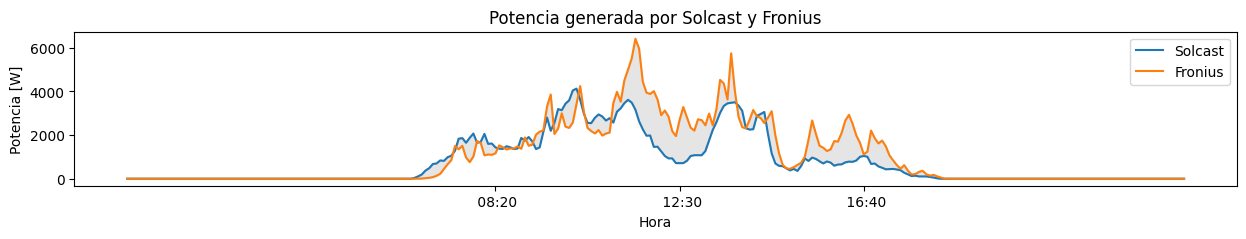

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 18.055648887468763
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 25.625512529235827 %
Horas de brillo solar = 1.4985598765432095


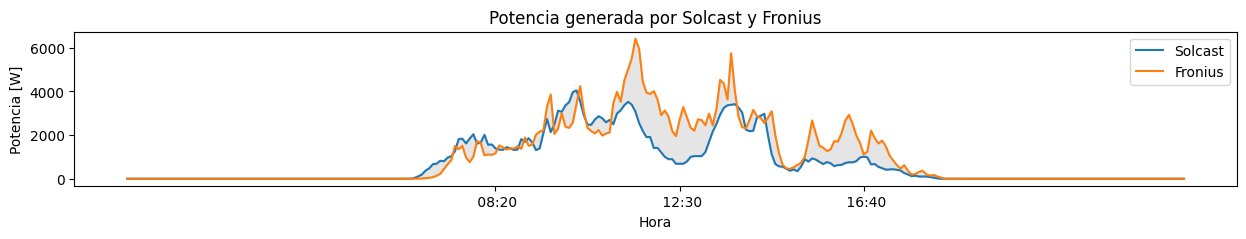

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 17.923619990168184
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 26.169363466372513 %
Horas de brillo solar = 1.4985598765432095


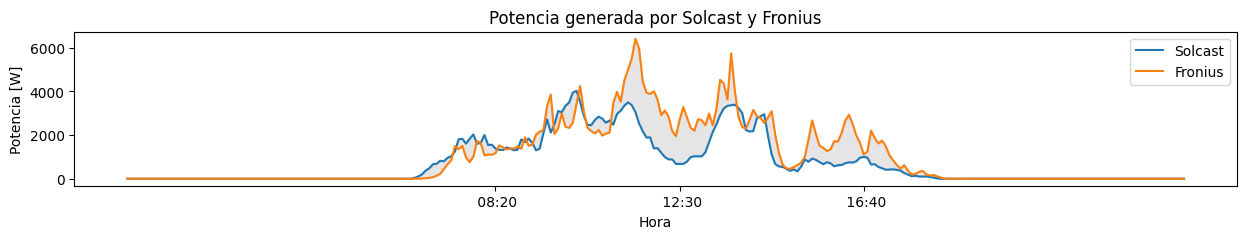

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 17.659562195567023
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 27.25706534064587 %
Horas de brillo solar = 1.4985598765432095


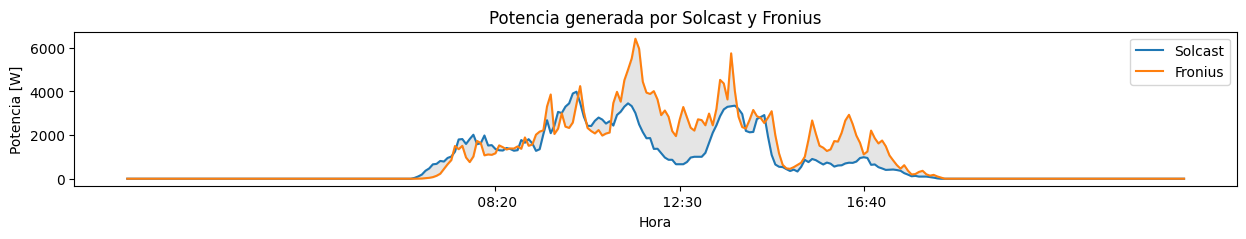

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 17.395504400965862
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 28.34476721491924 %
Horas de brillo solar = 1.4985598765432095


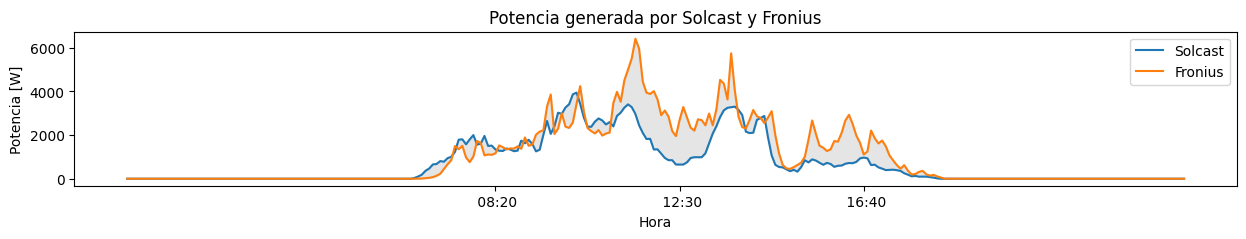

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️
Energía calculada solacast [kWh] = 17.527533298266444
Producción fotovoltaica SVF [kWh/día] = 24.27667
Error porcentual: 27.800916277782555 %
Horas de brillo solar = 1.4985598765432095


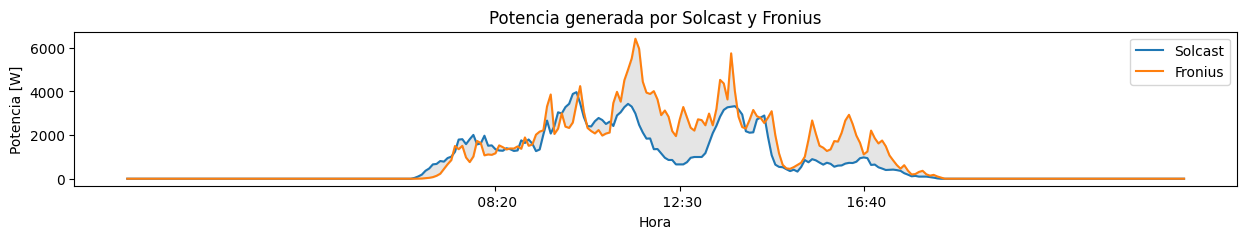

⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Cargar los datos del archivo CSV Data/Cleaned/SFV_2023.csv
df_SFV = pd.read_csv('../Data/Cleaned/SFV_2023.csv', sep=',')
# Cargar los datos del archivo CSV
df_solcast = pd.read_csv('../Data/Cleaned/solcast_2023.csv', sep=',')

def calculate_energy(alpha, beta, Fecha):
    # filtrar un día de datos
    row_day_solcast = df_solcast.loc[df_solcast['Date'] == Fecha]
    row_day_fronius = df_SFV.loc[df_SFV['Date'] == Fecha]

    # reiniciar el índice
    row_day_solcast = row_day_solcast.reset_index(drop=True)
    row_day_fronius = row_day_fronius.reset_index(drop=True)
    # Ordenar row_day_solcast de menor a mayor hora
    row_day_solcast = row_day_solcast.sort_values(by='Time')
    row_day_solcast = row_day_solcast.reset_index(drop=True)
    # Crear un nuevo dataframe con los datos de solcast y fronius a partir del índice
    df = pd.DataFrame()
    df['Time'] = row_day_solcast['Time']
    df['GHI'] = row_day_solcast['GHI']
    df['air_temp'] = row_day_solcast['air_temp']
    df['cloud_opacity'] = row_day_solcast['cloud_opacity']
    df['Producción_fotovoltaica_SFV'] = row_day_fronius['Producción_fotovoltaica_SFV']

    ## Modelo matemático
    # Parámetros alpha y beta
    alpha = alpha
    beta = beta

    # Parámetros SFV
    efficiency = 0.2094  # Eficiencia del panel solar
    catidad_pv = 30
    area = 2.274 * 1.134

    # Normalizar 'cloud_opacity' de 0 a 1  en donde 1 es el valor más alto
    df['cloud_opacity'] = df['cloud_opacity'] / df['cloud_opacity'].max()
    # Normalizar 'air_temp' de 0 a 1  en donde 1 es el valor más alto
    df['air_temp'] = df['air_temp'] / df['air_temp'].max()

    # Energía calculada a partir de Solcast
    df['P_cloud_opacity_temp'] = df['GHI'] * efficiency * area * catidad_pv * (1 - beta * df['cloud_opacity']) * (
                1 - alpha * df['air_temp'])
    # Suma de la potencia generada solcast
    energia = df['P_cloud_opacity_temp'].sum() * (5 / 60)
    print("Energía calculada solacast [kWh] =", energia / 1000)

    # Energía calculada a partir de Fronius
    df['Potencia'] = df['Producción_fotovoltaica_SFV'] / (5 / 60)
    energia_fronius = df['Producción_fotovoltaica_SFV'].sum()
    print("Producción fotovoltaica SVF [kWh/día] =", energia_fronius / 1000)

    # Error porcentual
    error = abs(energia - energia_fronius) / energia_fronius * 100
    print('Error porcentual:', error, '%')

    # Horas de brillo solar
    hbs = energia_fronius / (30 * 0.54)
    print("Horas de brillo solar =", hbs / 1000)

    return df

def plot_energy(df):
    # Graficar la energía generada por solcast y fronius
    plt.figure(figsize=(15, 2))
    plt.plot(df['Time'], df['P_cloud_opacity_temp'], label='Solcast')
    plt.plot(df['Time'], df['Potencia'], label='Fronius')
    # Graficar área bajo la curva
    plt.fill_between(df['Time'], df['P_cloud_opacity_temp'], df['Potencia'], color='gray', alpha=0.2)
    plt.title('Potencia generada por Solcast y Fronius')
    plt.xlabel('Hora')
    plt.ylabel('Potencia [W]')
    plt.legend()
    plt.xticks([100, 150, 200])
    plt.show()
    print("⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️⚽️")

# Definir los widgets
alpha_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Alpha:')
beta_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Beta:')
fecha_dropdown = widgets.Dropdown(options=df_solcast['Date'].unique(), description='Fecha:')

# Crear la función para mostrar la salida al interactuar con los widgets
def on_value_change(change):
    alpha = alpha_slider.value
    beta = beta_slider.value
    fecha = fecha_dropdown.value
    df = calculate_energy(alpha, beta, fecha)
    plot_energy(df)

# Conectar la función al evento de cambio de valor de los widgets
alpha_slider.observe(on_value_change, names='value')
beta_slider.observe(on_value_change, names='value')
fecha_dropdown.observe(on_value_change, names='value')


# Mostrar los widgets y la gráfica inicial
display(alpha_slider, beta_slider, fecha_dropdown)



initial_date = fecha_dropdown.value
initial_alpha = alpha_slider.value
initial_beta = beta_slider.value
initial_df = calculate_energy(initial_alpha, initial_beta, initial_date)
plot_energy(initial_df)


___
